# Description

The primary objective of the diabetes dataset is to predict whether the given patient has diabetes or not. Here in this project I going to take two dataset to get better by including some medical predictor variable and outcome. predictor variable includes Gender, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age. This will help in getting atmost good result for our model.	

**First_Dataset** :- https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database                                                   
**Second_Dataset** :- https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

# Importing Dataset and some dependencies library

In [822]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [823]:
# importing dataset
data_1 = pd.read_csv("D://code all//diabetes project//Diabetes_1.csv")
data_2 = pd.read_csv("D://code all//diabetes project//Diabetes_2.csv")

In [824]:
# seeing top 5 rows
data_1.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [825]:
# info of dataset
data_2.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [826]:
#shape and columns of data
print('Shape of data_1 :- ',data_1.shape)
print("-"*50)
print('columns of data_1 : - ', data_1.columns)
print("-"*50)
print('Shape of data_2 :-  ',data_2.shape)
print("-"*50)
print('columns of data_2 : - ', data_2.columns)

Shape of data_1 :-  (768, 9)
--------------------------------------------------
columns of data_1 : -  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
--------------------------------------------------
Shape of data_2 :-   (100000, 9)
--------------------------------------------------
columns of data_2 : -  Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


# Cleaning DATA_1

In [827]:
#info of dataset
data_1['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [828]:
# types of all columns
data_1.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [829]:
# missing value
data_1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [830]:
# duplicated rows
data_1.duplicated().sum()

0

In [831]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [832]:
data_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Observation** :- From the above describe function , we see that minimum value of 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI' is 0, and from that i assume that value must not be 0 so i going to remove it using mean value.

In [833]:
data_columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for column in data_columns:
    zero_count = (data_1[column] == 0).sum()
    print(f"Count of 0 in '{column}' column: {zero_count}")


Count of 0 in 'Glucose' column: 5
Count of 0 in 'BloodPressure' column: 35
Count of 0 in 'SkinThickness' column: 227
Count of 0 in 'Insulin' column: 374
Count of 0 in 'BMI' column: 11


In [834]:
data_1['Glucose']=data_1['Glucose'].replace(0,data_1['Glucose'].mean())
data_1['BloodPressure']=data_1['BloodPressure'].replace(0,data_1['BloodPressure'].mean())
data_1['SkinThickness']=data_1['SkinThickness'].replace(0,data_1['SkinThickness'].mean())
data_1['Insulin']=data_1['Insulin'].replace(0,data_1['Insulin'].mean())
data_1['BMI']=data_1['BMI'].replace(0,data_1['BMI'].mean())

In [835]:
data_columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for column in data_columns:
    zero_count = (data_1[column] == 0).sum()
    print(f"Count of 0 in '{column}' column: {zero_count}")


Count of 0 in 'Glucose' column: 0
Count of 0 in 'BloodPressure' column: 0
Count of 0 in 'SkinThickness' column: 0
Count of 0 in 'Insulin' column: 0
Count of 0 in 'BMI' column: 0


In [836]:
data_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [837]:
data_1.insert(loc=1, column='Gender', value='Female')

In [838]:
data_1.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,Female,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,Female,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,Female,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,Female,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,Female,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


# Working on Dataset 2

In [839]:
data_2['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [840]:
# types of all columns
data_2.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [841]:
# missing value
data_2.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [842]:
data_2.duplicated().sum()

3854

In [843]:
data_22 = data_2.drop_duplicates()

In [844]:
data_22.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [845]:
data_22.duplicated().sum()

0

In [846]:
data_22.shape

(96146, 9)

In [847]:
data_22.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [848]:
data_22.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [849]:
data_22 = data_22.rename(columns={'age': 'Age', 'gender': 'Gender', 'bmi': 'BMI', 'blood_glucose_level': 'Glucose', 'diabetes': 'Outcome'})



In [850]:
data_22.shape

(96146, 9)

In [851]:
data_22['Gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: Gender, dtype: int64

In [852]:
a = len(data_22[data_22['Age']<21])
b = len(data_22[data_22['Age']>=21])
a , b

(20212, 75934)

In [853]:
data_22['Age'] = data_22['Age'].astype('int64')
data_22['Glucose'] = data_22['Glucose'].astype('float64')


In [854]:
data_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           96146 non-null  object 
 1   Age              96146 non-null  int64  
 2   hypertension     96146 non-null  int64  
 3   heart_disease    96146 non-null  int64  
 4   smoking_history  96146 non-null  object 
 5   BMI              96146 non-null  float64
 6   HbA1c_level      96146 non-null  float64
 7   Glucose          96146 non-null  float64
 8   Outcome          96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [855]:
data_1 = data_1.sample(n=500, random_state=1)

In [856]:
data_1.shape

(500, 10)

In [857]:
data_22 = data_22.sample(n=300, random_state=2)

In [858]:
data_22.shape

(300, 9)

# Concatenating the both dataset

In [859]:
new_df = pd.concat([data_1,data_22], ignore_index=True)

In [860]:
new_df.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,hypertension,heart_disease,smoking_history,HbA1c_level
0,7.0,Female,136.0,74.0,26.000000,135.000000,26.0,0.647,51,0,NaN,NaN,NaN,NaN
1,1.0,Female,151.0,60.0,20.536458,79.799479,26.1,0.179,22,0,NaN,NaN,NaN,NaN
2,6.0,Female,109.0,60.0,27.000000,79.799479,25.0,0.206,27,0,NaN,NaN,NaN,NaN
3,3.0,Female,61.0,82.0,28.000000,79.799479,34.4,0.243,46,0,NaN,NaN,NaN,NaN
4,1.0,Female,116.0,78.0,29.000000,180.000000,36.1,0.496,25,0,NaN,NaN,NaN,NaN


In [861]:
new_df.shape

(800, 14)

In [862]:
new_df.dtypes

Pregnancies                 float64
Gender                       object
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
hypertension                float64
heart_disease               float64
smoking_history              object
HbA1c_level                 float64
dtype: object

In [863]:
new_df.isnull().sum()

Pregnancies                 300
Gender                        0
Glucose                       0
BloodPressure               300
SkinThickness               300
Insulin                     300
BMI                           0
DiabetesPedigreeFunction    300
Age                           0
Outcome                       0
hypertension                500
heart_disease               500
smoking_history             500
HbA1c_level                 500
dtype: int64

In [864]:
new_df['BloodPressure'] = new_df['BloodPressure'].astype('float64')
# data_22['Glucose'] =data_22['Glucose'].astype('float64')

In [865]:
# mean_value=gfg['G2'].mean()
new_df['BloodPressure'].fillna(value=new_df['BloodPressure'].mean(), inplace=True)
new_df['SkinThickness'].fillna(value=new_df['SkinThickness'].mean(), inplace=True)
new_df['Insulin'].fillna(value=new_df['Insulin'].mean(), inplace=True)
new_df['DiabetesPedigreeFunction'].fillna(value=new_df['DiabetesPedigreeFunction'].mean(), inplace=True)

In [866]:
new_df.isnull().sum()

Pregnancies                 300
Gender                        0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
hypertension                500
heart_disease               500
smoking_history             500
HbA1c_level                 500
dtype: int64

In [867]:
new_df['Gender'].value_counts()

Female    676
Male      124
Name: Gender, dtype: int64

In [868]:
final_data= new_df.drop(['Pregnancies','hypertension','heart_disease','smoking_history','HbA1c_level'],axis=1)

In [869]:
final_data.head()

,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Female,136.0,74.0,26.000000,135.000000,26.0,0.647,51,0
1,Female,151.0,60.0,20.536458,79.799479,26.1,0.179,22,0
2,Female,109.0,60.0,27.000000,79.799479,25.0,0.206,27,0
3,Female,61.0,82.0,28.000000,79.799479,34.4,0.243,46,0
4,Female,116.0,78.0,29.000000,180.000000,36.1,0.496,25,0


In [870]:
final_data.sample(20)

,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
515,Female,158.0,72.500641,26.939573,121.983755,17.46,0.48406,5,0
452,Female,111.0,86.000000,19.000000,79.799479,30.10,0.14300,23,0
484,Female,128.0,68.000000,19.000000,180.000000,30.50,1.39100,25,1
444,Female,122.0,68.000000,20.536458,79.799479,31.20,0.25800,41,0
719,Female,100.0,72.500641,26.939573,121.983755,21.34,0.48406,70,0
563,Male,200.0,72.500641,26.939573,121.983755,27.32,0.48406,50,1
461,Female,104.0,74.000000,20.536458,79.799479,28.80,0.15300,48,0
683,Female,130.0,72.500641,26.939573,121.983755,21.37,0.48406,37,0
96,Female,125.0,60.000000,20.000000,140.000000,33.80,0.08800,31,0
626,Female,80.0,72.500641,26.939573,121.983755,34.91,0.48406,28,0


In [871]:
final_data['Gender'].value_counts()

Female    676
Male      124
Name: Gender, dtype: int64

# DATA PREPROCESSING

<Axes: xlabel='Outcome', ylabel='count'>

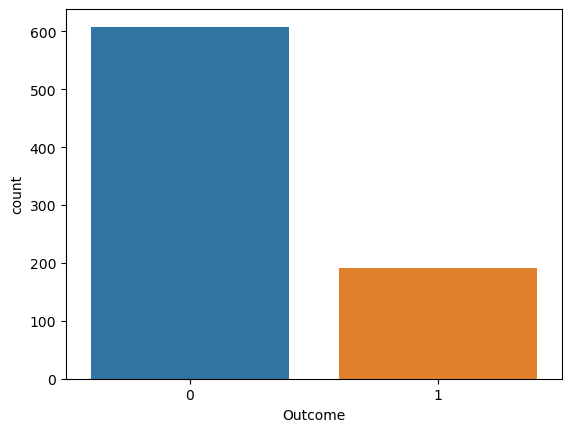

In [872]:
sns.countplot(x='Outcome' ,data = final_data)


From the above graph, 0 represents the person is non diabetic and 1 represents the person is diabetic. In this its also tells the dataset is imbalanced as getting more diabetic is less than not getting diabetic as result

<Axes: ylabel='Outcome'>

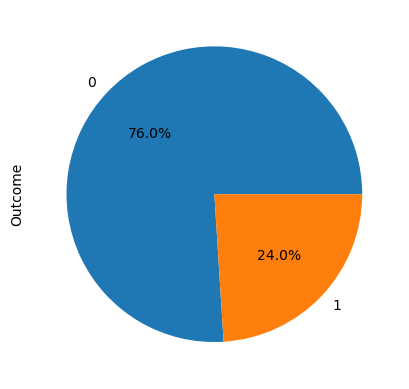

In [873]:
final_data['Outcome'].value_counts().plot(kind='pie',autopct = '%1.1f%%')

<Axes: xlabel='Gender', ylabel='count'>

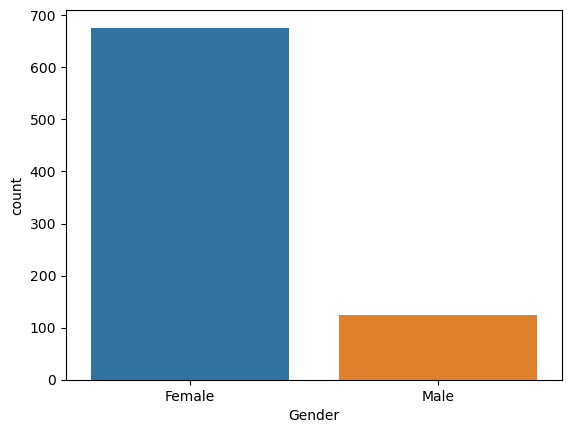

In [874]:
sns.countplot(x='Gender' ,data = final_data)


<Axes: ylabel='Gender'>

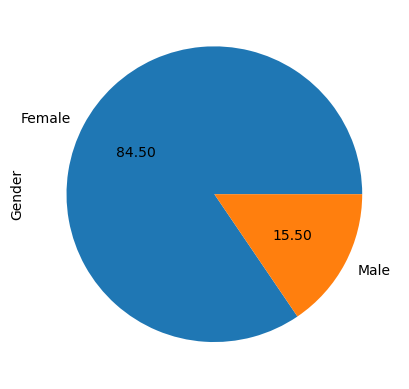

In [875]:
final_data['Gender'].value_counts().plot(kind='pie',autopct='%.2f')

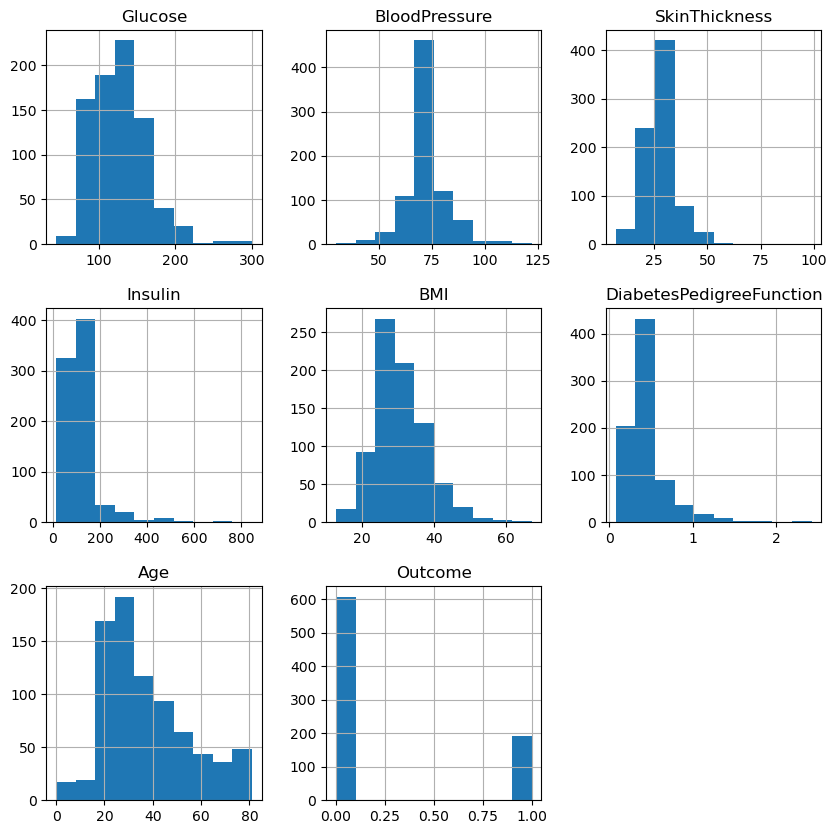

In [876]:
# plt.hist(final_data['Age'],bins=5)
final_data.hist(bins=10, figsize=(10,10))
plt.show()


<Axes: xlabel='Outcome', ylabel='Age'>

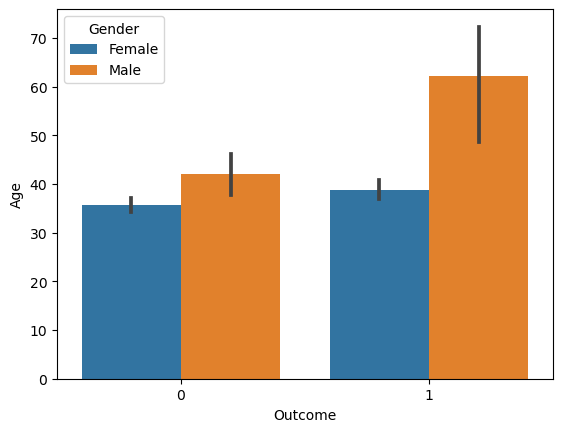

In [877]:
# sns.barplot(final_data['Outcome'],final_data['Age'],hue=final_data['Gender'])
sns.barplot(data=final_data, x="Outcome", y="Age", hue="Gender")

<Axes: xlabel='Age', ylabel='Glucose'>

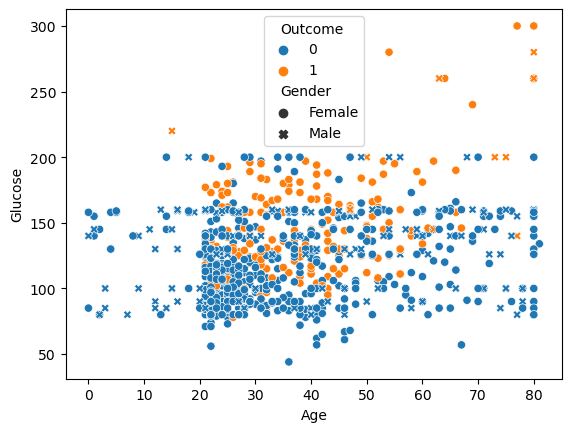

In [878]:
sns.scatterplot(data=final_data, x="Age", y="Glucose", hue="Outcome",style="Gender")

<Axes: xlabel='Age', ylabel='BMI'>

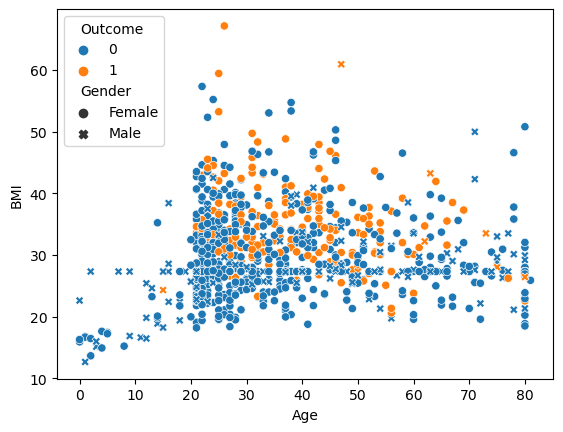

In [879]:
sns.scatterplot(data=final_data, x="Age", y="BMI", hue="Outcome",style="Gender")

<Axes: xlabel='Age', ylabel='BloodPressure'>

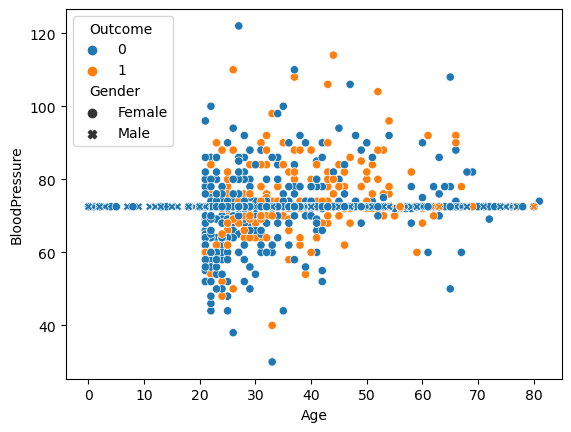

In [880]:
sns.scatterplot(data=final_data, x="Age", y="BloodPressure", hue="Outcome",style="Gender")

<Axes: xlabel='Age', ylabel='SkinThickness'>

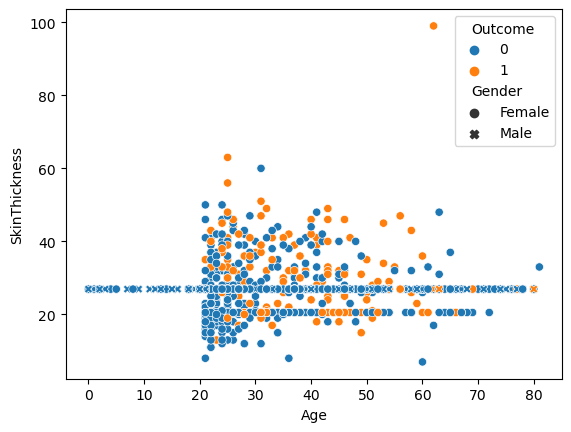

In [881]:
sns.scatterplot(data=final_data, x="Age", y="SkinThickness", hue="Outcome",style="Gender")

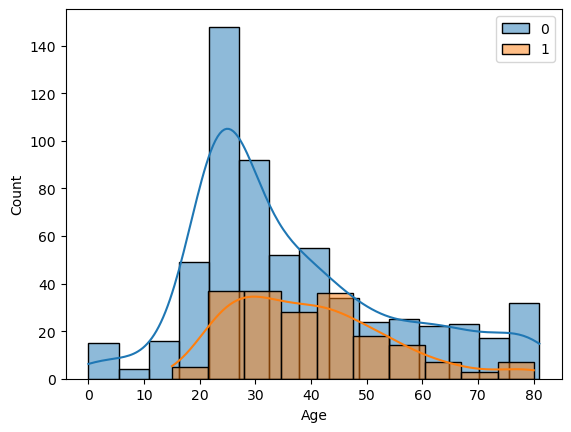

In [882]:
sns.histplot(data=final_data[final_data['Outcome'] == 0]['Age'], label='0', kde=True)
sns.histplot(data=final_data[final_data['Outcome'] == 1]['Age'], label='1', kde=True)

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()


<Axes: ylabel='Count'>

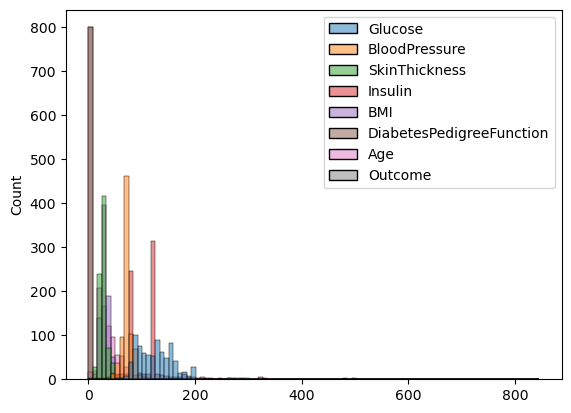

In [883]:
sns.histplot(data=final_data)

In [884]:
final_data.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_13940\4285913857.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_data.corr()


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.119614,0.113908,0.277906,0.039610,0.118937,0.243843,0.372059
BloodPressure,0.119614,1.000000,0.125886,0.005642,0.210822,0.003079,0.159612,0.154103
SkinThickness,0.113908,0.125886,1.000000,0.222307,0.397267,0.158186,0.026615,0.167954
Insulin,0.277906,0.005642,0.222307,1.000000,0.135019,0.152410,0.012789,0.110562
BMI,0.039610,0.210822,0.397267,0.135019,1.000000,0.132298,0.035329,0.293458
DiabetesPedigreeFunction,0.118937,0.003079,0.158186,0.152410,0.132298,1.000000,0.006870,0.160014
Age,0.243843,0.159612,0.026615,0.012789,0.035329,0.006870,1.000000,0.078675
Outcome,0.372059,0.154103,0.167954,0.110562,0.293458,0.160014,0.078675,1.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_13940\3590320639.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)


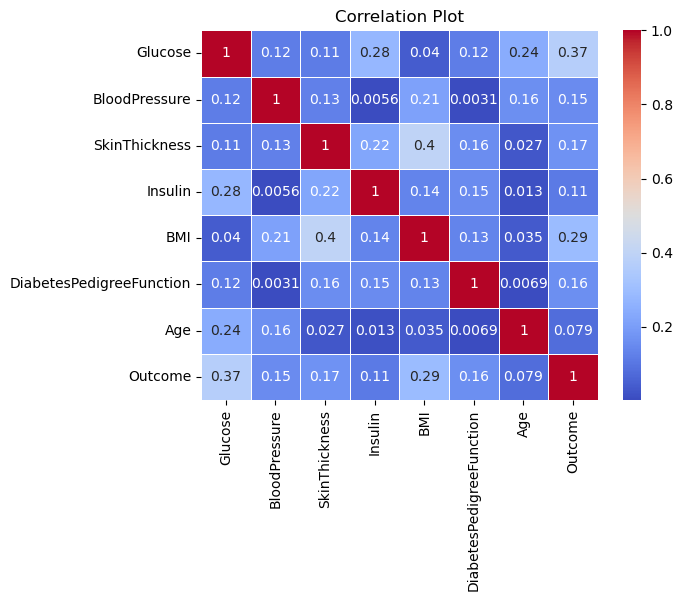

In [885]:
# Create a heatmap using Seaborn
sns.heatmap(final_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Plot")
plt.show()

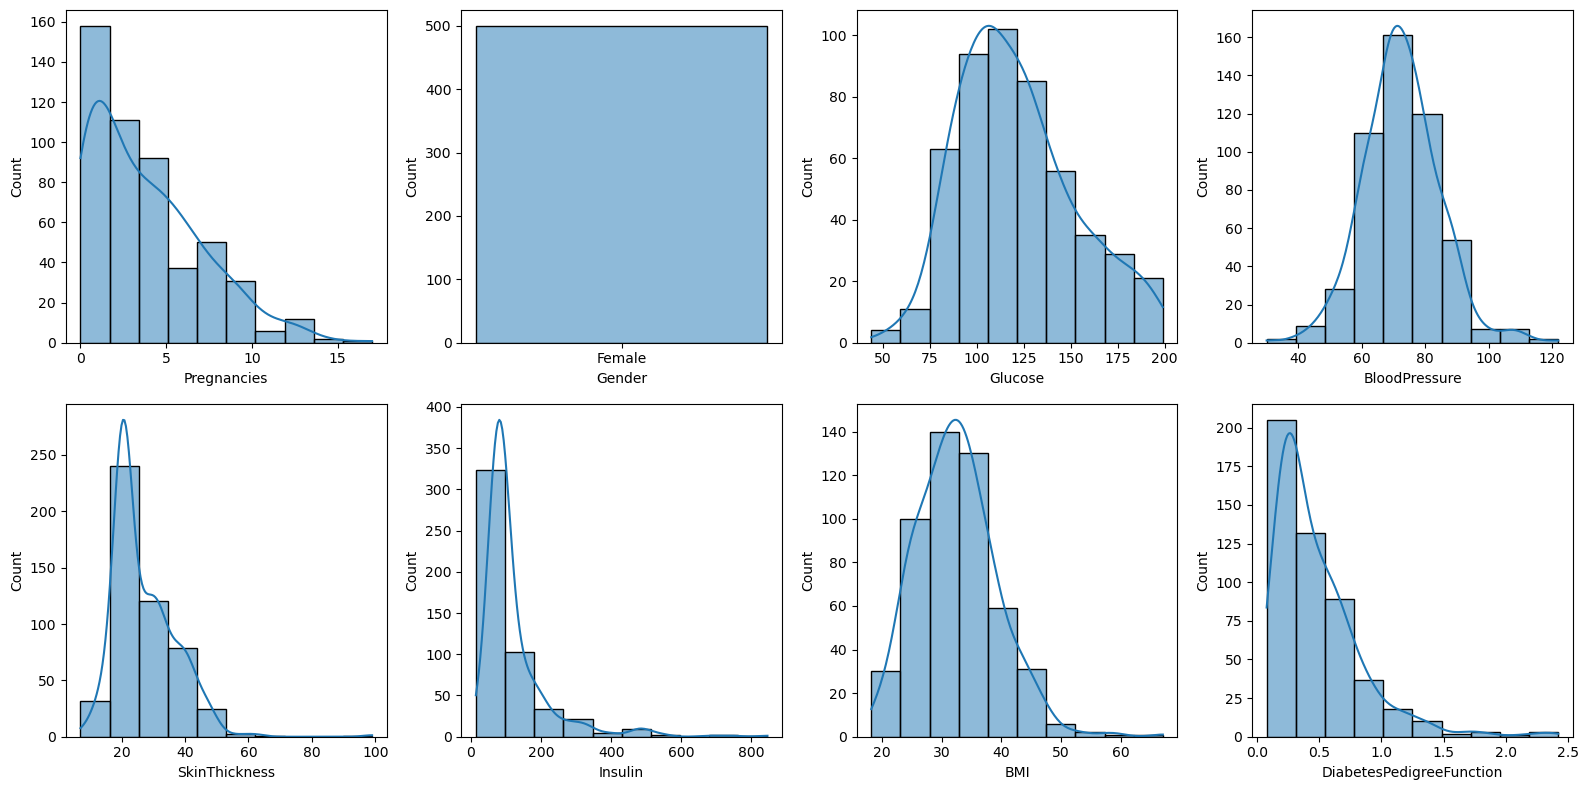

In [886]:
columns = data_1.columns[:8]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

axes = axes.flatten()
for i, column in enumerate(columns):
    sns.histplot(data=data_1, x=column, bins=10, kde=True, ax=axes[i])
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()


In [887]:
# final_data.groupby(['Gender'])['Outcome'].count().plot(kind = 'bar',color = 'magenta')

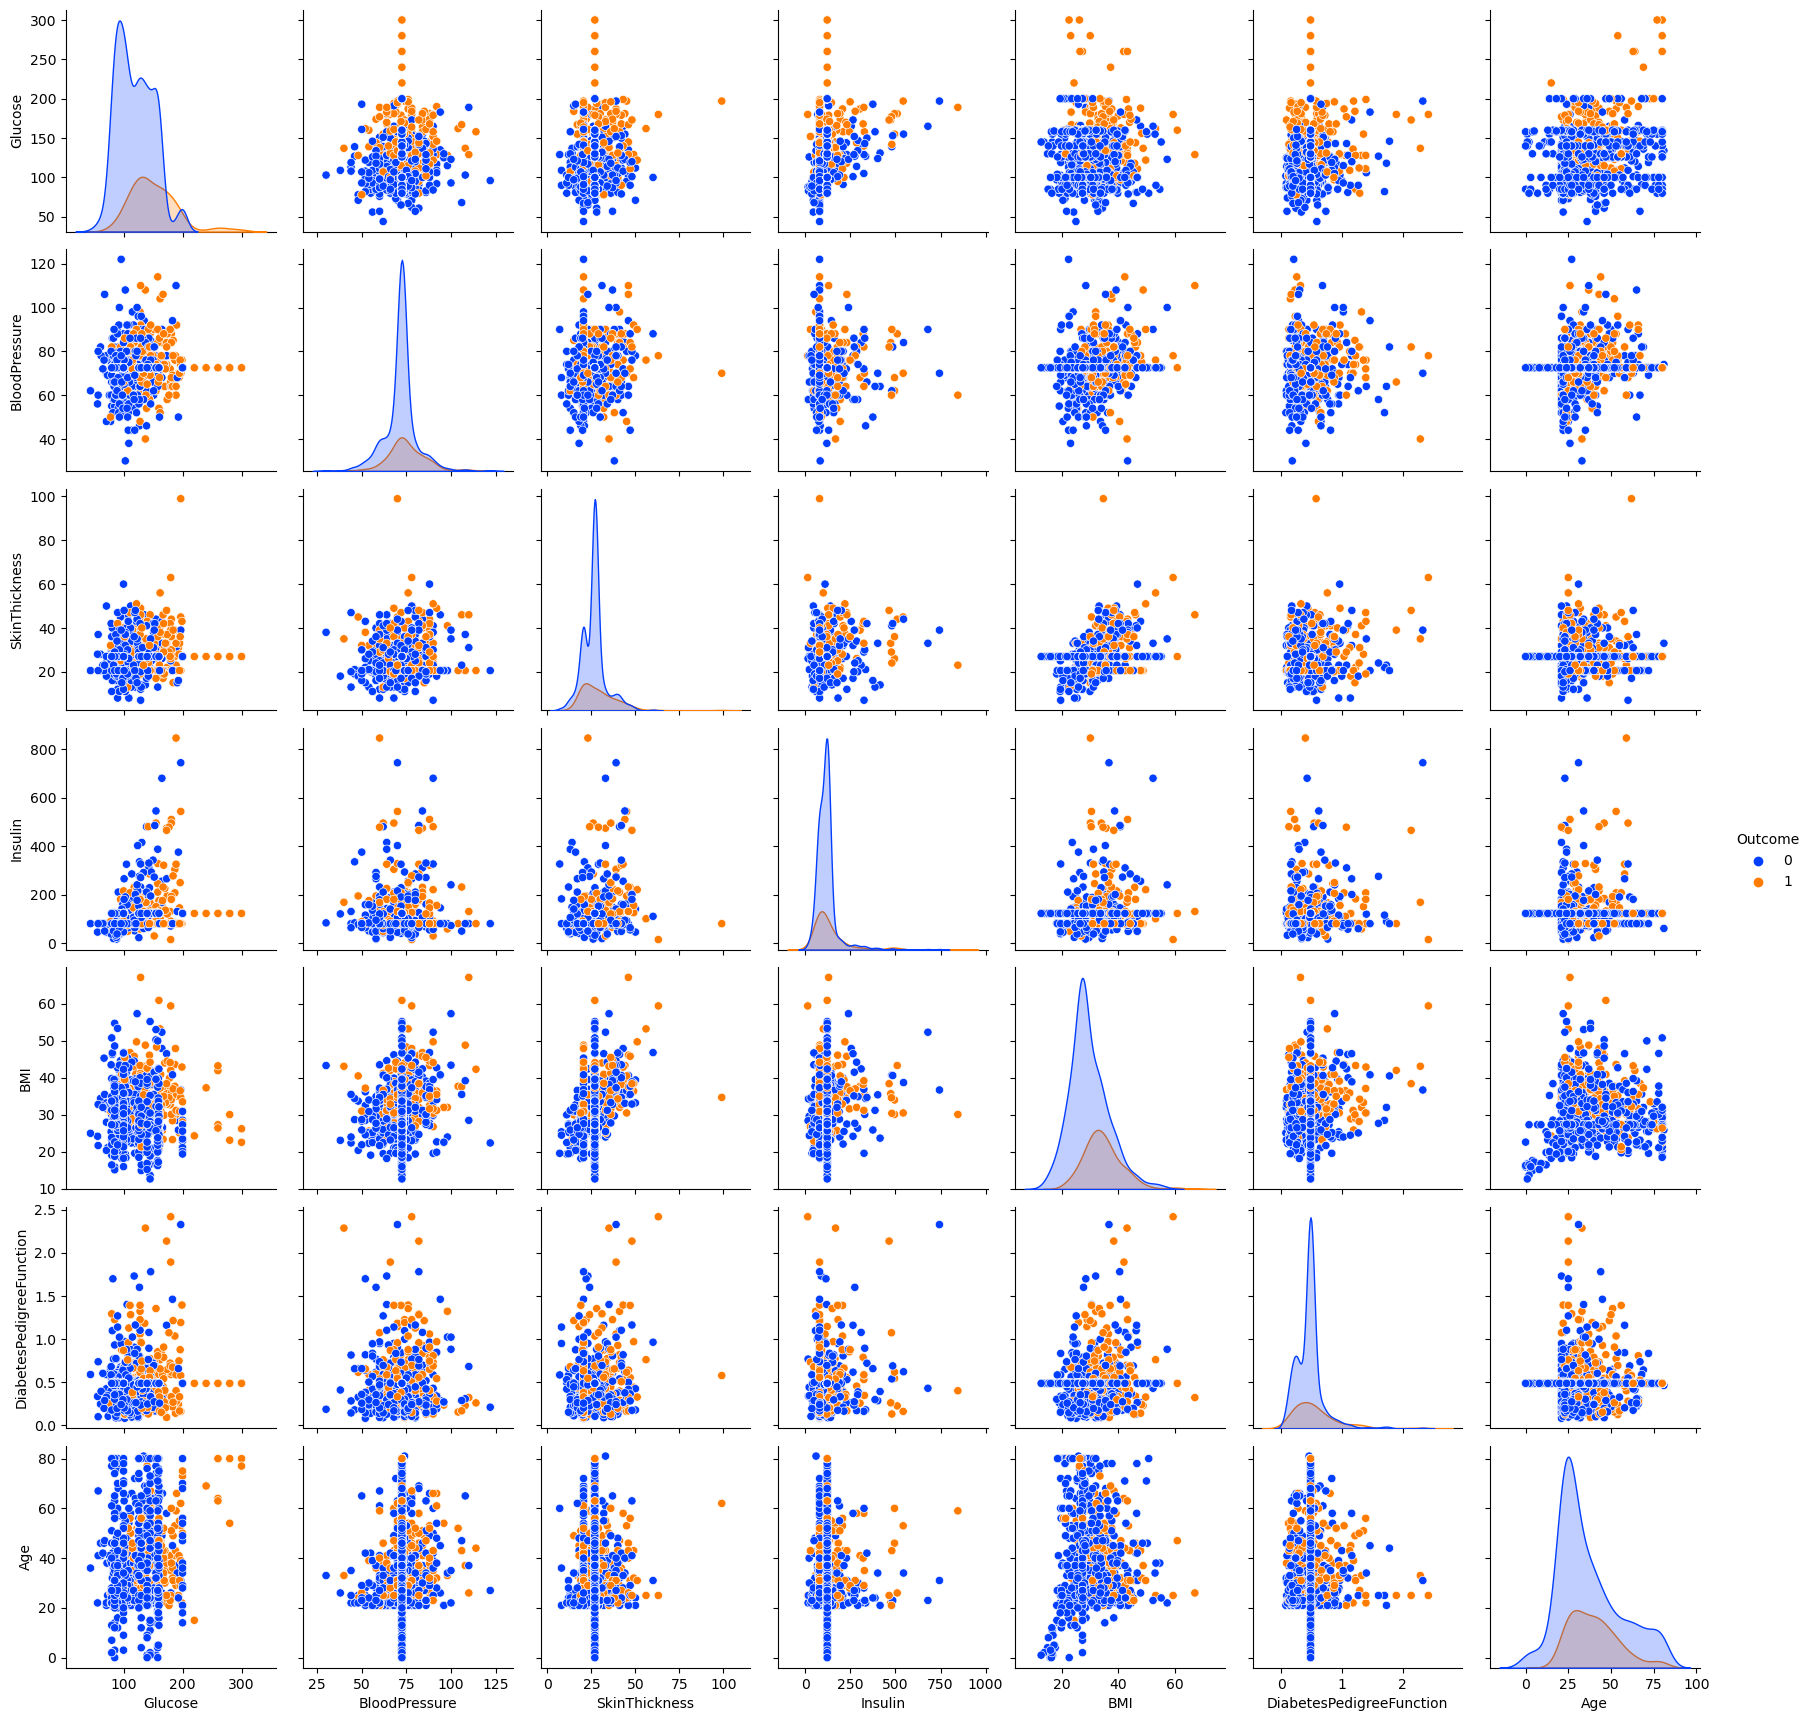

In [888]:
sns.pairplot(data = final_data, hue = 'Outcome',palette="bright")
plt.show()

In [889]:
final_data.to_csv('final_data_diabetes.csv', index=False)

In [890]:
data = final_data.copy()

In [891]:
data.head()

,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Female,136.0,74.0,26.000000,135.000000,26.0,0.647,51,0
1,Female,151.0,60.0,20.536458,79.799479,26.1,0.179,22,0
2,Female,109.0,60.0,27.000000,79.799479,25.0,0.206,27,0
3,Female,61.0,82.0,28.000000,79.799479,34.4,0.243,46,0
4,Female,116.0,78.0,29.000000,180.000000,36.1,0.496,25,0


In [892]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
data['Gender'] = lr.fit_transform(data['Gender'])

In [893]:
# Split the dataset usin train-test split from sklearn

from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (640, 8)
X_test shape: (160, 8)
y_train shape: (640,)
y_test shape: (160,)


In [894]:
X_train

,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
298,0,124.0,60.000000,32.000000,79.799479,35.80,0.51400,21
318,0,122.0,90.000000,51.000000,220.000000,49.70,0.32500,31
557,0,140.0,72.500641,26.939573,121.983755,27.32,0.48406,21
208,0,105.0,58.000000,40.000000,94.000000,34.90,0.22500,25
776,0,158.0,72.500641,26.939573,121.983755,26.91,0.48406,80
...,...,...,...,...,...,...,...,...
68,0,140.0,85.000000,33.000000,79.799479,37.40,0.24400,41
766,1,100.0,72.500641,26.939573,121.983755,16.00,0.48406,3
354,0,159.0,66.000000,20.536458,79.799479,30.40,0.38300,36
272,0,84.0,64.000000,23.000000,115.000000,36.90,0.47100,28


In [895]:
y_train

298    0
318    1
557    0
208    0
776    0
      ..
68     0
766    0
354    1
272    0
340    1
Name: Outcome, Length: 640, dtype: int64

In [896]:
# Balance the dataset using smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Outcome before SMOTE:")
print(y.value_counts())
print("-----------------------------")

print("Outcome after SMOTE:")
print((y_train_resampled).value_counts())

Outcome before SMOTE:
0    608
1    192
Name: Outcome, dtype: int64
-----------------------------
Outcome after SMOTE:
0    486
1    486
Name: Outcome, dtype: int64


In [897]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_data_scaled = pd.DataFrame(scaler.fit_transform(X_train_resampled), columns=X_train.columns)

X_test_data_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("Scaled training set:")
print(X_train_data_scaled)

print("\nScaled test set:")
print(X_test_data_scaled)


Scaled training set:
     Gender   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.0  0.275720       0.326087       0.271739  0.090136  0.479569   
1       0.0  0.267490       0.652174       0.478261  0.282192  0.767890   
2       0.0  0.341564       0.461963       0.216734  0.147923  0.303671   
3       0.0  0.197531       0.304348       0.358696  0.109589  0.460900   
4       0.0  0.415638       0.461963       0.216734  0.147923  0.295167   
..      ...       ...            ...            ...       ...       ...   
967     0.0  0.329053       0.476320       0.147135  0.090136  0.257577   
968     0.0  0.198676       0.467830       0.395205  0.270084  0.531350   
969     0.0  0.450707       0.672210       0.225532  0.090136  0.485357   
970     0.0  0.872271       0.461963       0.216734  0.147923  0.264820   
971     0.0  0.215194       0.511141       0.278634  0.126764  0.553947   

     DiabetesPedigreeFunction       Age  
0                    0.186166  0.259

# MODEL BUILDING

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

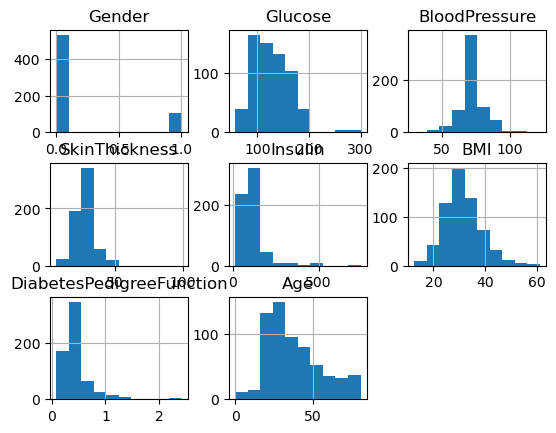

In [898]:
X_train.hist()

In [899]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_data_scaled, y_train_resampled)

LogisticRegression(random_state=42)

In [900]:
# Navie-Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_data_scaled, y_train_resampled)

GaussianNB()

In [901]:
# support vector machine
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train_data_scaled, y_train_resampled)

SVC(kernel='linear', random_state=42)

In [902]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train_data_scaled, y_train_resampled)

KNeighborsClassifier(n_neighbors=24)

In [903]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dtc.fit(X_train_data_scaled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [904]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
rfc.fit(X_train_data_scaled, y_train_resampled)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [905]:
# Making predictions on test dataset using various model
Y_pred_lr = lr.predict(X_test_data_scaled)
Y_pred_knn = knn.predict(X_test_data_scaled)
Y_pred_svc = svc.predict(X_test_data_scaled)
Y_pred_gnb = gnb.predict(X_test_data_scaled)
Y_pred_dtc = dtc.predict(X_test_data_scaled)
Y_pred_rfc = rfc.predict(X_test_data_scaled)

# MODEL EVALUATION

In [906]:
# Training and testing score for logistic regression
from sklearn.metrics import accuracy_score
print("Train Accuracy of Logistic Regression",lr.score(X_train_data_scaled, y_train_resampled)*100)
print("Test Accuracy of Logistic Regression",lr.score(X_test_data_scaled, y_test)*100)
print("Accuracy Test score of Logistic Regression" ,accuracy_score(y_test, Y_pred_lr)*100)


Train Accuracy of Logistic Regression 74.8971193415638
Test Accuracy of Logistic Regression 71.25
Accuracy Test score of Logistic Regression 71.25


In [907]:
# Training and testing score for Navie Bayes
print("Train Accuracy of Navie Bayes",gnb.score(X_train_data_scaled, y_train_resampled)*100)
print("Test Accuracy of Navie Bayes",gnb.score(X_test_data_scaled, y_test)*100)
print("Accuracy Test score of Navie Bayes" ,accuracy_score(y_test, Y_pred_gnb)*100)

Train Accuracy of Navie Bayes 76.440329218107
Test Accuracy of Navie Bayes 72.5
Accuracy Test score of Navie Bayes 72.5


In [908]:
# Training and testing score for support vector machine
print("Train Accuracy of support vector machine",svc.score(X_train_data_scaled, y_train_resampled)*100)
print("Test Accuracy of support vector machine",svc.score(X_test_data_scaled, y_test)*100)
print("Accuracy Test score of support vector machine" ,accuracy_score(y_test, Y_pred_svc)*100)

Train Accuracy of support vector machine 75.30864197530865
Test Accuracy of support vector machine 71.875
Accuracy Test score of support vector machine 71.875


In [909]:
# Training and testing score for knn
print("Train Accuracy of knn",knn.score(X_train_data_scaled, y_train_resampled)*100)
print("Test Accuracy of knn",knn.score(X_test_data_scaled, y_test)*100)
print("Accuracy Test score of knn" ,accuracy_score(y_test, Y_pred_knn)*100)

Train Accuracy of knn 83.0246913580247
Test Accuracy of knn 79.375
Accuracy Test score of knn 79.375


In [910]:
# Training and testing score for Decision Tree Classifier
print("Train Accuracy of Decision Tree Classifier",dtc.score(X_train_data_scaled, y_train_resampled)*100)
print("Test Accuracy of Decision Tree Classifier",dtc.score(X_test_data_scaled, y_test)*100)
print("Accuracy Test score of Decision Tree Classifier" ,accuracy_score(y_test, Y_pred_dtc)*100)

Train Accuracy of Decision Tree Classifier 100.0
Test Accuracy of Decision Tree Classifier 76.875
Accuracy Test score of Decision Tree Classifier 76.875


In [911]:
# Training and testing score for Random Forest Classifier
print("Train Accuracy of Random Forest Classifier",rfc.score(X_train_data_scaled, y_train_resampled)*100)
print("Test Accuracy of Random Forest Classifier",rfc.score(X_test_data_scaled, y_test)*100)
print("Accuracy Test score of Random Forest Classifier" ,accuracy_score(y_test, Y_pred_rfc)*100)

Train Accuracy of Random Forest Classifier 99.38271604938271
Test Accuracy of Random Forest Classifier 81.875
Accuracy Test score of Random Forest Classifier 81.875


From the above comparison, we observe that Random forest Classifier has best accuracy

In [921]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rfc, X_train_data_scaled, y_train_resampled, cv=5, scoring='accuracy')
print(cv_scores*100)

[87.69230769 85.12820513 91.2371134  86.08247423 86.59793814]


In [912]:
# confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test,Y_pred_rfc)
conf_matrix = confusion_matrix(y_test, Y_pred_rfc)

# Generate a classification report
class_report = classification_report(y_test, Y_pred_rfc)

# Print the confusion matrix and classification report
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[104  18]
 [ 11  27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88       122
           1       0.60      0.71      0.65        38

    accuracy                           0.82       160
   macro avg       0.75      0.78      0.76       160
weighted avg       0.83      0.82      0.82       160



Text(0.5, 1.0, 'Diabetes Level Confusion Matrix')

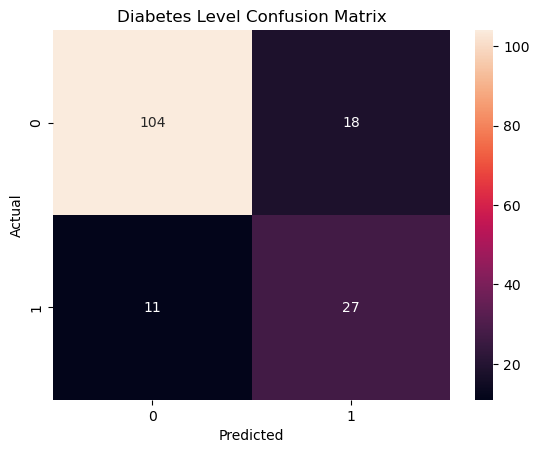

In [913]:


# Heatmap of Confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Diabetes Level Confusion Matrix")

Text(0.5, 1.0, 'RFC Feature Importance')

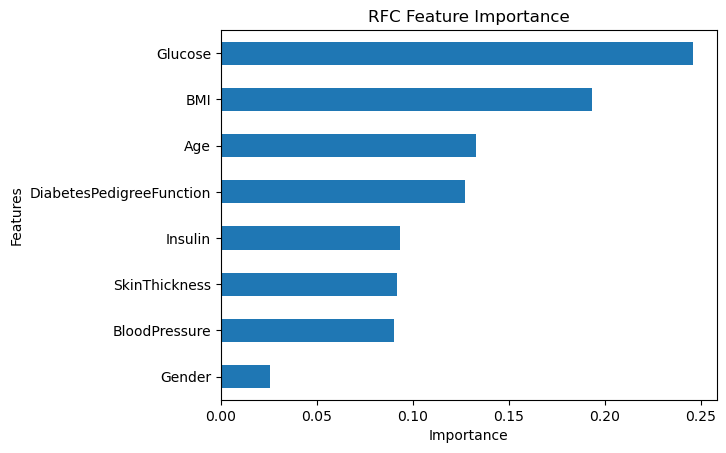

In [925]:

importances = rfc.feature_importances_
feat_imp = pd.Series(importances, index=X_train_data_scaled.columns).sort_values()
feat_imp.plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("RFC Feature Importance")

In [ ]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(rfc, f)

In [650]:

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load your dataset or use a sample dataset (e.g., Iris dataset)
# X, y = load_iris(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of classification algorithms to test
algorithms = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('DecisionTreeClassifier',DecisionTreeClassifier()),
]

# Create an empty dictionary to store the cross-validation results
cv_results = {}

# Iterate over each algorithm
for algo_name, algo in algorithms:
    # Create a pipeline with data preprocessing (scaling) and the current algorithm
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', algo)
    ])
    
    # Perform cross-validation (5-fold in this example, but you can adjust it)
    cv_scores = cross_val_score(pipeline, X_train_data_scaled, y_train_resampled, cv=5, scoring='accuracy')
    
    # Store the mean accuracy in the results dictionary
    cv_results[algo_name] = np.mean(cv_scores)

# Find the algorithm with the highest mean accuracy
best_algorithm = max(cv_results, key=cv_results.get)
best_accuracy = cv_results[best_algorithm]

print(f"The best algorithm is {best_algorithm} with an accuracy of {best_accuracy:.2f}")

The best algorithm is Random Forest with an accuracy of 0.89
